# Poisson Distribution - Python Implementation

This notebook demonstrates the implementation and applications of the Poisson distribution using Python.


## 1. Basic Implementation


In [1]:
import math

def poisson_pmf(k, lambda_param):
    """Calculate Poisson probability mass function"""
    if k < 0:
        return 0
    return (math.exp(-lambda_param) * (lambda_param ** k)) / math.factorial(k)

def poisson_cdf(k, lambda_param):
    """Calculate Poisson cumulative distribution function"""
    return sum(poisson_pmf(i, lambda_param) for i in range(k+1))

# Example: Average 3 calls per hour, probability of exactly 5 calls in an hour
lambda_param, k = 3, 5
probability = poisson_pmf(k, lambda_param)
print(f"P(X = {k}) = {probability:.4f}")

# Probability of 5 or fewer calls in an hour
cumulative_prob = poisson_cdf(k, lambda_param)
print(f"P(X ≤ {k}) = {cumulative_prob:.4f}")


P(X = 5) = 0.1008
P(X ≤ 5) = 0.9161


## 2. Distribution Example


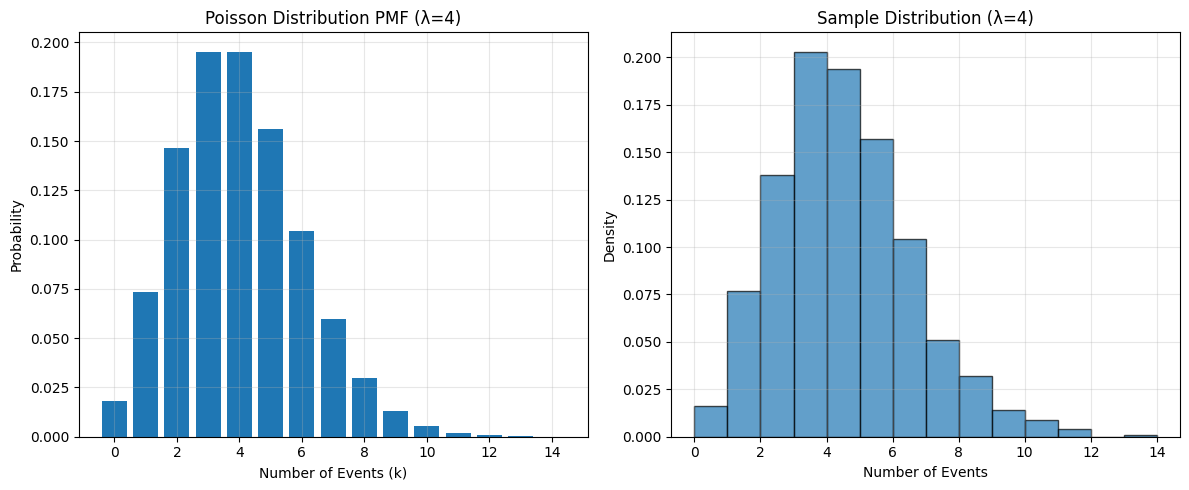

Sample mean: 4.03
Sample variance: 4.20
Theoretical mean: 4
Theoretical variance: 4


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Parameters
lambda_param = 4

# Generate random samples
samples = np.random.poisson(lambda_param, 1000)

# Calculate probabilities for different k values
k_values = range(0, 15)
probabilities = [stats.poisson.pmf(k, lambda_param) for k in k_values]

# Plot
plt.figure(figsize=(12, 5))

# Subplot 1: PMF
plt.subplot(1, 2, 1)
plt.bar(k_values, probabilities)
plt.title(f'Poisson Distribution PMF (λ={lambda_param})')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)

# Subplot 2: Sample histogram
plt.subplot(1, 2, 2)
plt.hist(samples, bins=range(0, max(samples)+2), density=True, alpha=0.7, edgecolor='black')
plt.title(f'Sample Distribution (λ={lambda_param})')
plt.xlabel('Number of Events')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print(f"Sample mean: {np.mean(samples):.2f}")
print(f"Sample variance: {np.var(samples):.2f}")
print(f"Theoretical mean: {lambda_param}")
print(f"Theoretical variance: {lambda_param}")


## 3. Key Python Packages

### 3.1 SciPy Stats


In [3]:
from scipy import stats

# Example usage
lambda_param = 5
k = 3

print("SciPy Stats Functions:")
print(f"PMF: {stats.poisson.pmf(k, lambda_param):.4f}")    # Probability Mass Function
print(f"CDF: {stats.poisson.cdf(k, lambda_param):.4f}")    # Cumulative Distribution Function
print(f"PPF (0.5): {stats.poisson.ppf(0.5, lambda_param):.1f}")    # Quantile function (median)

# Random samples
samples = stats.poisson.rvs(lambda_param, size=10)
print(f"Random samples: {samples}")

# Survival function (1 - CDF)
survival = stats.poisson.sf(k, lambda_param)
print(f"Survival function P(X > {k}): {survival:.4f}")


SciPy Stats Functions:
PMF: 0.1404
CDF: 0.2650
PPF (0.5): 5.0
Random samples: [6 7 5 8 7 7 2 4 4 5]
Survival function P(X > 3): 0.7350


### 3.2 NumPy


In [4]:
import numpy as np

# Random sampling
lambda_param = 6
samples = np.random.poisson(lambda_param, size=20)
print(f"NumPy random samples: {samples}")
print(f"Mean of samples: {np.mean(samples):.2f}")
print(f"Expected mean: {lambda_param}")

# Compare with theoretical values
theoretical_mean = lambda_param
theoretical_var = lambda_param
sample_mean = np.mean(samples)
sample_var = np.var(samples, ddof=1)

print(f"\nComparison:")
print(f"Theoretical mean: {theoretical_mean}")
print(f"Sample mean: {sample_mean:.2f}")
print(f"Theoretical variance: {theoretical_var}")
print(f"Sample variance: {sample_var:.2f}")


NumPy random samples: [ 8  3  3  5 10  8 11 10  4  3  5  8  4  4  8  4  9  5 10  4]
Mean of samples: 6.30
Expected mean: 6

Comparison:
Theoretical mean: 6
Sample mean: 6.30
Theoretical variance: 6
Sample variance: 7.69


## 4. Data Science Applications

### 4.1 Staffing


In [5]:
# Example: Call center modeling
# Average 10 calls per hour, what's the probability of different scenarios?

lambda_calls = 10  # calls per hour

# Probability of exactly 15 calls in an hour
prob_15_calls = stats.poisson.pmf(15, lambda_calls)
print(f"P(15 calls in 1 hour) = {prob_15_calls:.4f}")

# Probability of more than 12 calls (overload scenario)
prob_overload = stats.poisson.sf(12, lambda_calls)
print(f"P(>12 calls - overload) = {prob_overload:.4f}")

# Probability of 5 or fewer calls (underutilized)
prob_underutilized = stats.poisson.cdf(5, lambda_calls)
print(f"P(≤5 calls - underutilized) = {prob_underutilized:.4f}")

# For 30-minute intervals (λ = 5)
lambda_30min = 5
prob_8_calls_30min = stats.poisson.pmf(8, lambda_30min)
print(f"P(8 calls in 30 minutes) = {prob_8_calls_30min:.4f}")

# Calculate optimal staffing levels
# Find k such that P(X > k) < 0.05 (95% service level)
for k in range(20):
    if stats.poisson.sf(k, lambda_calls) < 0.05:
        print(f"95% service level: Staff for up to {k} calls/hour")
        break


P(15 calls in 1 hour) = 0.0347
P(>12 calls - overload) = 0.2084
P(≤5 calls - underutilized) = 0.0671
P(8 calls in 30 minutes) = 0.0653
95% service level: Staff for up to 15 calls/hour


### 4.2 Reliability Analysis


In [6]:
# Example: System failure analysis
# Average 2 failures per month, analyze reliability scenarios

lambda_failures = 2  # failures per month

# Probability of no failures in a month
prob_no_failures = stats.poisson.pmf(0, lambda_failures)
print(f"P(0 failures in 1 month) = {prob_no_failures:.4f}")

# Probability of 1 or fewer failures (acceptable reliability)
prob_acceptable = stats.poisson.cdf(1, lambda_failures)
print(f"P(≤1 failure - acceptable) = {prob_acceptable:.4f}")

# Probability of 4 or more failures (critical situation)
prob_critical = stats.poisson.sf(3, lambda_failures)
print(f"P(≥4 failures - critical) = {prob_critical:.4f}")

# For quarterly analysis (λ = 6 failures per quarter)
lambda_quarterly = 6
prob_critical_q = stats.poisson.sf(11, lambda_quarterly)
print(f"P(≥12 failures - critical in 1 quarter) = {prob_critical_q:.4f}")

P(0 failures in 1 month) = 0.1353
P(≤1 failure - acceptable) = 0.4060
P(≥4 failures - critical) = 0.1429
P(≥12 failures - critical in 1 quarter) = 0.0201


### 4.3 Network Traffic Analysis


In [7]:
# Example: Web server request modeling
# Average 50 requests per minute, analyze traffic patterns

lambda_requests = 50  # requests per minute

# Probability of more than 70 requests (potential overload)
prob_overload = stats.poisson.sf(70, lambda_requests)
print(f"P(>70 requests - potential overload) = {prob_overload:.4f}")

# Calculate bandwidth requirements
# Find k such that P(X > k) < 0.01 (99% capacity planning)
for k in range(100):
    if stats.poisson.sf(k, lambda_requests) < 0.01:
        print(f"99% capacity planning: Plan for up to {k} requests/minute")
        break

# Simulate traffic patterns
np.random.seed(42)
hourly_traffic = np.random.poisson(lambda_requests * 60, 24)  # 24 hours
print(f"\nSimulated hourly traffic (requests/hour):")
print(f"Peak hour: {np.max(hourly_traffic)} requests")
print(f"Average: {np.mean(hourly_traffic):.0f} requests/hour")
print(f"Standard deviation: {np.std(hourly_traffic):.0f} requests/hour")


P(>70 requests - potential overload) = 0.0030
99% capacity planning: Plan for up to 67 requests/minute

Simulated hourly traffic (requests/hour):
Peak hour: 3060 requests
Average: 2980 requests/hour
Standard deviation: 43 requests/hour


### 4.4 Approximation Examples


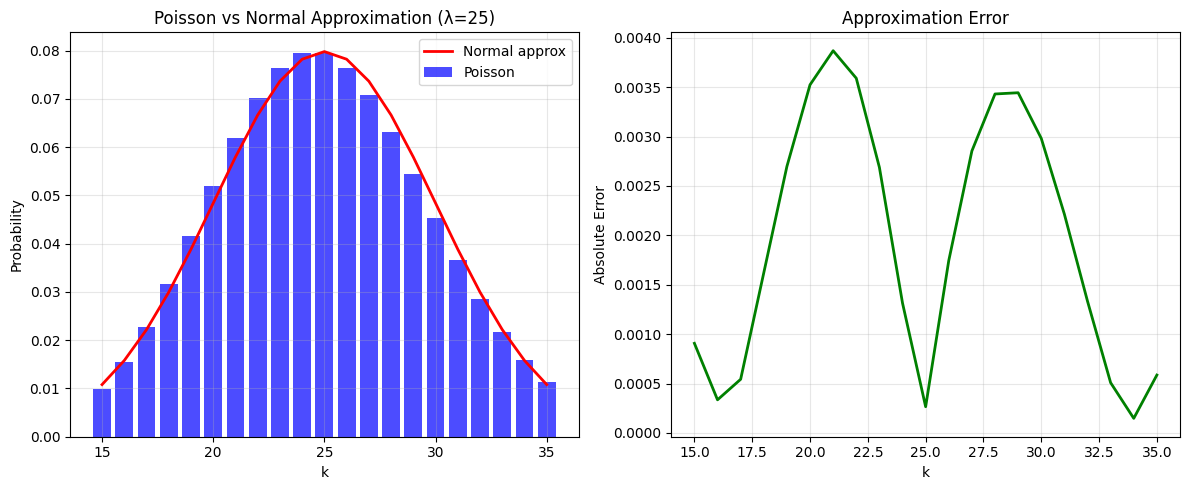

Maximum approximation error: 0.0039
Mean approximation error: 0.0019

Binomial to Poisson approximation:
Binomial P(X=5): 0.037453
Poisson P(X=5): 0.037833
Difference: 0.000380


In [8]:
# Normal approximation to Poisson
lambda_param = 25  # Large lambda for normal approximation

# Poisson probabilities
k_values = range(15, 36)
poisson_probs = [stats.poisson.pmf(k, lambda_param) for k in k_values]

# Normal approximation
normal_probs = [stats.norm.pdf(k, lambda_param, np.sqrt(lambda_param)) for k in k_values]

# Compare
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(k_values, poisson_probs, alpha=0.7, label='Poisson', color='blue')
plt.plot(k_values, normal_probs, 'r-', linewidth=2, label='Normal approx')
plt.title(f'Poisson vs Normal Approximation (λ={lambda_param})')
plt.xlabel('k')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)

# Error analysis
errors = [abs(p - n) for p, n in zip(poisson_probs, normal_probs)]
plt.subplot(1, 2, 2)
plt.plot(k_values, errors, 'g-', linewidth=2)
plt.title('Approximation Error')
plt.xlabel('k')
plt.ylabel('Absolute Error')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Maximum approximation error: {max(errors):.4f}")
print(f"Mean approximation error: {np.mean(errors):.4f}")

# Binomial to Poisson approximation
n, p = 1000, 0.01  # Large n, small p
lambda_binom = n * p

k = 5
binom_prob = stats.binom.pmf(k, n, p)
poisson_prob = stats.poisson.pmf(k, lambda_binom)

print(f"\nBinomial to Poisson approximation:")
print(f"Binomial P(X={k}): {binom_prob:.6f}")
print(f"Poisson P(X={k}): {poisson_prob:.6f}")
print(f"Difference: {abs(binom_prob - poisson_prob):.6f}")
